In [1]:
# IMPORTING ALL THE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings(action = "ignore", category = FutureWarning)

In [6]:
data= pd.read_excel("assignment.xlsx")
data

,Year,Month,Segment,Region,KPI,Value Type,Value
0,2020,12,Clients,India,Lv1_Visitors,Actuals,3665558
1,2020,12,Clients,India,Lv2_Visitors,Actuals,2689569
2,2020,12,Clients,India,Lv3_Visitors,Actuals,1300571
3,2020,12,Clients,India,Lv4_Visitors,Actuals,717608
4,2020,12,Clients,India,Lv3_Visitors,Actuals,706677
...,...,...,...,...,...,...,...
1567,2022,1,Customers,Dehradun,Lv5_Visitors,Actuals,1693
1568,2022,1,Customers,Aurangabad,Lv4_Visitors,Actuals,1428
1569,2022,1,Customers,Ujjain,Lv5_Visitors,Actuals,1311
1570,2022,1,Customers,Faridabad,Lv5_Visitors,Actuals,1071


In [7]:
data.shape

(1572, 7)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        1572 non-null   int64 
 1   Month       1572 non-null   int64 
 2   Segment     1572 non-null   object
 3   Region      1572 non-null   object
 4   KPI         1572 non-null   object
 5   Value Type  1572 non-null   object
 6   Value       1572 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 86.1+ KB


In [9]:
data.isna().sum()

Year          0
Month         0
Segment       0
Region        0
KPI           0
Value Type    0
Value         0
dtype: int64

In [10]:
print("The KPI values are-", data['KPI'].unique())
print("The year are-", data["Year"].unique())


The KPI values are- ['Lv1_Visitors' 'Lv2_Visitors' 'Lv3_Visitors' 'Lv4_Visitors'
 'Lv5_Visitors']
The year are- [2020 2021 2022]


In [11]:
print(data['Value Type'].unique())

['Actuals']


In [12]:
data['KPI'].value_counts()


Lv3_Visitors    324
Lv4_Visitors    324
Lv5_Visitors    324
Lv1_Visitors    300
Lv2_Visitors    300
Name: KPI, dtype: int64

In [13]:
print(data["Segment"].unique())

['Clients' 'Customers']


In [14]:
data['Segment'].value_counts()

Customers    1080
Clients       492
Name: Segment, dtype: int64

## This data set seems to be that of which keeps track of the visiting customer in year 2020.2021.2022  . Here there are 2 type of segment one is clients and other is customer. The customer count are much more than that of clients.
## Another variable is KPI which has Lv_Visitor which is visitor in level 1,2,3,4,5.
## In this data set , the clients and customer data is given for particular year with the country/city name along with their visitor level.

In [15]:
# pivot the data based on the 'KPI' column
pivoted_data = data.pivot(columns='KPI', values='Value')

# print the pivoted data
print(pivoted_data)


KPI   Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  Lv4_Visitors  Lv5_Visitors
0        3665558.0           NaN           NaN           NaN           NaN
1              NaN     2689569.0           NaN           NaN           NaN
2              NaN           NaN     1300571.0           NaN           NaN
3              NaN           NaN           NaN      717608.0           NaN
4              NaN           NaN      706677.0           NaN           NaN
...            ...           ...           ...           ...           ...
1567           NaN           NaN           NaN           NaN        1693.0
1568           NaN           NaN           NaN        1428.0           NaN
1569           NaN           NaN           NaN           NaN        1311.0
1570           NaN           NaN           NaN           NaN        1071.0
1571           NaN           NaN           NaN           NaN         527.0

[1572 rows x 5 columns]


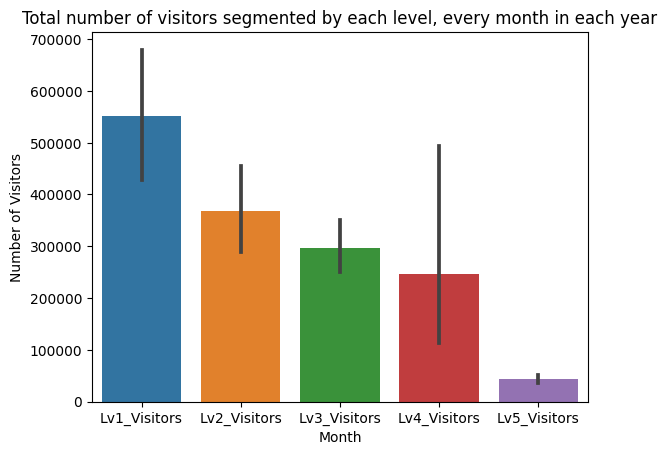

In [16]:
# plot the pivoted data
sns.barplot(data=pivoted_data)
plt.xlabel('Month')
plt.ylabel('Number of Visitors')
plt.title('Total number of visitors segmented by each level, every month in each year')
plt.show()

## Here we can see that the number of visitor decreases as we go up to the level 5.
## From the barplot it can be observed that the visitor decreses as the level increases.

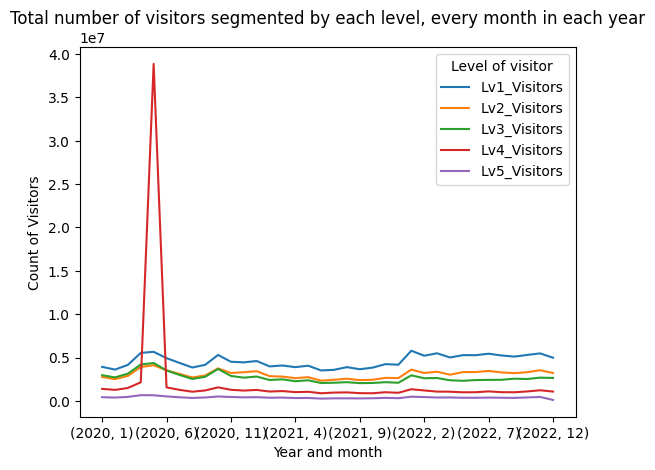

In [18]:
# pivoted data based on the 'Year', 'Month', and 'KPI' columns
pivoted_data = pd.pivot_table(data, index=['Year', 'Month'], columns='KPI', values='Value', aggfunc='sum')

# plot the pivoted data

pivoted_data.plot(kind='line')
plt.xlabel('Year and month')
plt.ylabel('Count of Visitors')
plt.title('Total number of visitors segmented by each level, every month in each year')
plt.legend(title='Level of visitor', loc='upper right')
plt.show()


In [19]:
# calculate the percentage difference between years for each region
diff_perc = pivoted_data.pct_change(axis=0) * 100

print(diff_perc)

KPI         Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  Lv4_Visitors  \
Year Month                                                           
2020 1               NaN           NaN           NaN           NaN   
     2         -8.066744     -9.211430     -8.566721     -8.636612   
     3         15.022641     14.874948     15.676383     17.186385   
     4         33.279076     35.586251     33.796819     44.080816   
     5          2.253317      5.322152      4.061402   1708.735627   
     6        -12.899481    -14.235955    -19.524616    -95.978032   
     7        -11.008287    -11.855078    -14.686738    -18.266210   
     8        -12.239103    -13.214256    -15.460946    -16.886880   
     9          8.023160      8.330736      9.754224     13.714230   
     10        27.438380     28.167508     32.465039     29.600698   
     11       -14.841601    -14.082705    -21.826872    -18.107635   
     12        -1.507132      2.535007     -6.878353     -6.841078   
2021 1          3.44

<Axes: xlabel='KPI'>

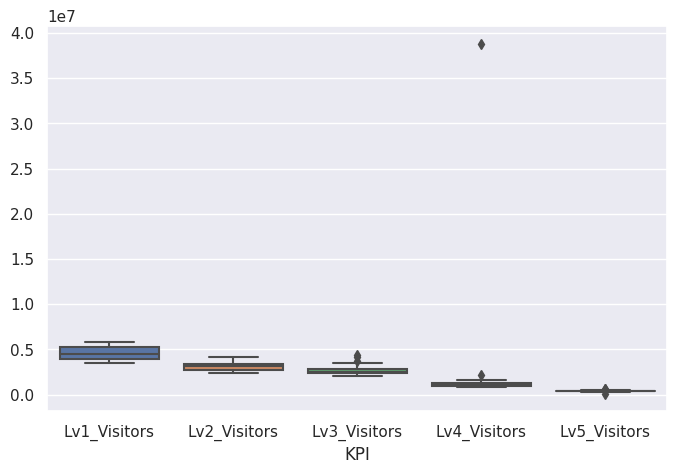

In [20]:
#checking outliers with box plot
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(data = pivoted_data)

In [21]:
pivoted_data.head()

KPI         Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  Lv4_Visitors  \
Year Month                                                           
2020 1           3928041       2765271       2965989       1392282   
     2           3611176       2510550       2711901       1272036   
     3           4153670       2883993       3137029       1490653   
     4           5535973       3910298       4197245       2147745   
     5           5660716       4118410       4367712      38847029   

KPI         Lv5_Visitors  
Year Month                
2020 1            432501  
     2            388833  
     3            463865  
     4            663513  
     5            653319

In [22]:
df = pd.pivot_table(data, index=['Year', 'Month', 'Segment', 'Region'], columns='KPI', values='Value', aggfunc='sum')
df.head(12)

KPI                              Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  \
Year Month Segment   Region                                                 
2020 1     Clients   India            3322789       2304318       2410633   
           Customers Aurangabad          7540          4992          6850   
                     Dehradun           28903         21332         25380   
                     Faridabad          14750         12968         17720   
                     India             424743        326618        371396   
                     Uddepy            103882         75152        108349   
                     Ujjain             25434         19891         25661   
     2     Clients   India            2976450       2021915       2101659   
           Customers Aurangabad          7092          4539          6080   
                     Dehradun           24712         18163         21917   
                     Faridabad          13964         12141         16720   
                     India             461165        361914        437011   

KPI                              Lv4_Visitors  Lv5_Visitors  
Year Month Segment   Region                                  
2020 1     Clients   India            1157186        363939  
           Customers Aurangabad          2157           934  
                     Dehradun            8578          3875  
                     Faridabad           8025          2344  
                     India             158246         42569  
                     Uddepy             48209         15447  
                     Ujjain              9881          3393  
     2     Clients   India            1011351        318689  
           Customers Aurangabad          1649           693  
                     Dehradun            7312          3141  
                     Faridabad           7564          2231  
                     India             187240         45722

In [23]:
# group by Region and calculate the sum of visitors of all the years.
grouped = df.groupby(['Region'])['Lv1_Visitors','Lv2_Visitors','Lv3_Visitors','Lv4_Visitors',
                                 'Lv5_Visitors'].sum().sort_values(by=['Lv1_Visitors'])
# print the resulting grouped data
print(grouped)


KPI         Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  Lv4_Visitors  \
Region                                                               
Aurangabad        276969        189034        209448         76051   
Faridabad        1070007        836005        850934        357927   
Indore           1482479        872927        661969        361346   
Ujjain           3137870       1938538       1712414        745804   
Dehradun         4292320       2656966       2077290        885352   
Uddepy          11900752       7425474       6741682       2717117   
India          143432468      96614542      83846004      74445040   

KPI         Lv5_Visitors  
Region                    
Aurangabad         30501  
Faridabad         116170  
Indore            165145  
Ujjain            305652  
Dehradun          403585  
Uddepy           1029255  
India           12127418  


The reason could be many such as-
1. They are not getting attracted by the site 
2. Good deals in other platforms
3. Lack of Promotions 
4. Quality issue
5. shipping and return policy

how they can improve.
1. first is to take small and timely survey from the existing customer which will help them to improve.
2. Promoting the website in different platforms
3. Giving good deal/offers around the year to bind the customers
4. improving nthe time of delivery and quick response for any query.



## Faridabad has highest growth year over year


In [26]:
# group by Region and calculate the sum of visitors of all the years.
grouped_1 = df.groupby(["Region",'Year'])['Lv1_Visitors','Lv2_Visitors','Lv3_Visitors','Lv4_Visitors',
                                 'Lv5_Visitors'].sum().sort_values(by=['Lv1_Visitors'])
# print the resulting grouped data
print(grouped_1)


KPI              Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  Lv4_Visitors  \
Region     Year                                                           
Aurangabad 2022         82786         54252         39666         14656   
           2020         92083         63071         88109         29622   
           2021        102100         71711         81673         31773   
Faridabad  2020        312711        275273        357617        166721   
Ujjain     2021        335540        232055        220982         94301   
Dehradun   2021        352787        250456        214565         78363   
Faridabad  2021        359870        286148        306888        140728   
Ujjain     2020        369639        285890        332701        136803   
Faridabad  2022        397426        274584        186429         50478   
Dehradun   2020        402599        295615        311845        111753   
Uddepy     2021       1068843        772889        809171        365173   
           2020       129

## with no informtion about the data set it is quote difficult to find exact meaning of the different levels. But guessing it can be- 


## Level 1 - Person visiting  the program for the first time
## level 2- person visting the program 2nd time
## level 3- person enquiring the program
## level 4- person joining the program
## level 5- person completed the program


In [28]:
# Create new feature
df['L5/L1 Visitors'] = df['Lv5_Visitors'] / df['Lv1_Visitors']
df['L4/L1 Visitors'] = df['Lv5_Visitors'] / df['Lv1_Visitors']
df['L5/L4 Visitors'] = df['Lv5_Visitors'] / df['Lv1_Visitors']
df['L3/L4 Visitors'] = df['Lv5_Visitors'] / df['Lv1_Visitors']
df.head()

KPI                              Lv1_Visitors  Lv2_Visitors  Lv3_Visitors  \
Year Month Segment   Region                                                 
2020 1     Clients   India            3322789       2304318       2410633   
           Customers Aurangabad          7540          4992          6850   
                     Dehradun           28903         21332         25380   
                     Faridabad          14750         12968         17720   
                     India             424743        326618        371396   

KPI                              Lv4_Visitors  Lv5_Visitors  L5/L1 Visitors  \
Year Month Segment   Region                                                   
2020 1     Clients   India            1157186        363939        0.109528   
           Customers Aurangabad          2157           934        0.123873   
                     Dehradun            8578          3875        0.134069   
                     Faridabad           8025          2344        0.158915   
                     India             158246         42569        0.100223   

KPI                              L4/L1 Visitors  L5/L4 Visitors  \
Year Month Segment   Region                                       
2020 1     Clients   India             0.109528        0.109528   
           Customers Aurangabad        0.123873        0.123873   
                     Dehradun          0.134069        0.134069   
                     Faridabad         0.158915        0.158915   
                     India             0.100223        0.100223   

KPI                              L3/L4 Visitors  
Year Month Segment   Region                      
2020 1     Clients   India             0.109528  
           Customers Aurangabad        0.123873  
                     Dehradun          0.134069  
                     Faridabad         0.158915  
                     India             0.100223

## Level 2:1 is quite good which mean the visitor find it engaging. 
## Level 4:3 and 5:4 has quite similar ratio . this means if the person come to level 4 it goes to level 5 too.
## The ratio of visitors in level 5 to level 1 is very low . That means the conversion rate of visitor to customer is very low. we need to work on that.